# 棒球数据分析

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 载入数据

In [2]:
baseball = pd.read_csv('baseball_data.csv')
for key in baseball.keys():
    if baseball[key].isnull().sum():
        print key

In [3]:
baseball.head(5)

,name,handedness,height,weight,avg,HR
0,Tom Brown,R,73,170,0.000,0
1,Denny Lemaster,R,73,182,0.130,4
2,Joe Nolan,L,71,175,0.263,27
3,Denny Doyle,L,69,175,0.250,16
4,Jose Cardenal,R,70,150,0.275,138


## 分类变量为一个离散变量和两个连续变量,得分情况为结果

In [4]:
baseball.describe()

,height,weight,avg,HR
count,1157.000000,1157.000000,1157.000000,1157.000000
mean,72.756266,184.513397,0.186793,45.359551
std,2.142272,15.445995,0.106175,74.065110
min,65.000000,140.000000,0.000000,0.000000
25%,71.000000,175.000000,0.138000,1.000000
50%,73.000000,185.000000,0.238000,15.000000
75%,74.000000,195.000000,0.258000,55.000000
max,80.000000,245.000000,0.328000,563.000000


In [5]:
# 惯用手分类计数
print baseball.groupby('handedness')["name"].count()

handedness
B    104
L    316
R    737
Name: name, dtype: int64


## 右手运动员更多

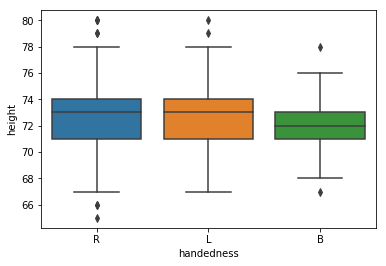

In [6]:
sns.boxplot(y = 'height', x='handedness', data = baseball)
plt.show()

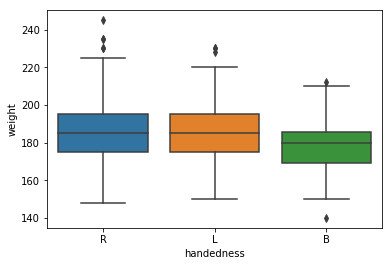

In [7]:
sns.boxplot(y = 'weight', x='handedness', data = baseball)
plt.show()

## 惯用手为双手的运动员,身高体重偏低

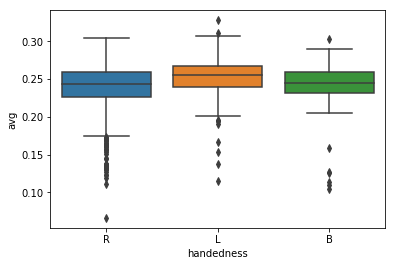

In [8]:
#sns.boxplot(y = 'avg', x='handedness', data = baseball)
sns.boxplot(y = 'avg', x='handedness', data = baseball[baseball['avg']!=0])
plt.show()

## 左手运动员平均分数更高

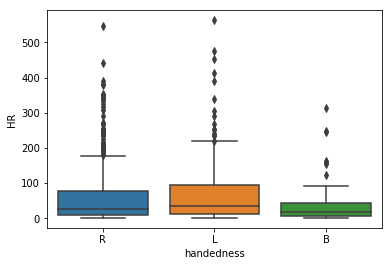

In [9]:
#sns.boxplot(y = 'HR', x='handedness', data = baseball)
sns.boxplot(y = 'HR', x='handedness', data = baseball[baseball['HR']!=0])
plt.show()

## 左手运动员全垒打分数更高

In [10]:
#平均数
baseball_mean=baseball.groupby('handedness').mean()
print baseball_mean


# 中位数
baseball_median=baseball.groupby('handedness').median()
print baseball_median

               height      weight       avg         HR
handedness                                            
B           72.019231  177.451923  0.205048  32.144231
L           72.715190  185.129747  0.204513  56.148734
R           72.877883  185.245590  0.176620  42.598372
            height  weight     avg    HR
handedness                              
B             72.0   180.0  0.2405  13.0
L             73.0   185.0  0.2480  23.5
R             73.0   185.0  0.2330  14.0


In [11]:
# 最终数据集
baseball_median.to_csv("baseball_median.csv")